In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("Titanic_train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# droping unessary columns 
data.drop(["PassengerId","Name","Ticket","Cabin"],axis=1, inplace=True)

In [5]:
data.shape

(891, 8)

In [6]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [7]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# using  median imputation grouped by Pclass & Sex. It balances simplicity + accuracy.
data["Age"] = data.groupby(["Sex","Pclass"])["Age"].transform(lambda x: x.fillna(x.median()))


In [10]:
data.groupby(["Sex","Pclass"])["Age"].sum()

Sex     Pclass
female  1         3257.00
        2         2181.50
        3         3121.50
male    1         5009.42
        2         3313.33
        3         9056.42
Name: Age, dtype: float64

In [11]:
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

C:\Users\niyam\AppData\Local\Temp\ipykernel_9804\3644085981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)


In [12]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
data.duplicated().sum()


np.int64(118)

In [14]:
data = data.drop_duplicates()


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 773 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  773 non-null    int64  
 1   Pclass    773 non-null    int64  
 2   Sex       773 non-null    object 
 3   Age       773 non-null    float64
 4   SibSp     773 non-null    int64  
 5   Parch     773 non-null    int64  
 6   Fare      773 non-null    float64
 7   Embarked  773 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.4+ KB


In [16]:
data= pd.get_dummies(data, columns=['Sex','Embarked'], drop_first=True, dtype= int )

In [17]:
cat_col=data.drop(["Age","Fare"], axis=1)

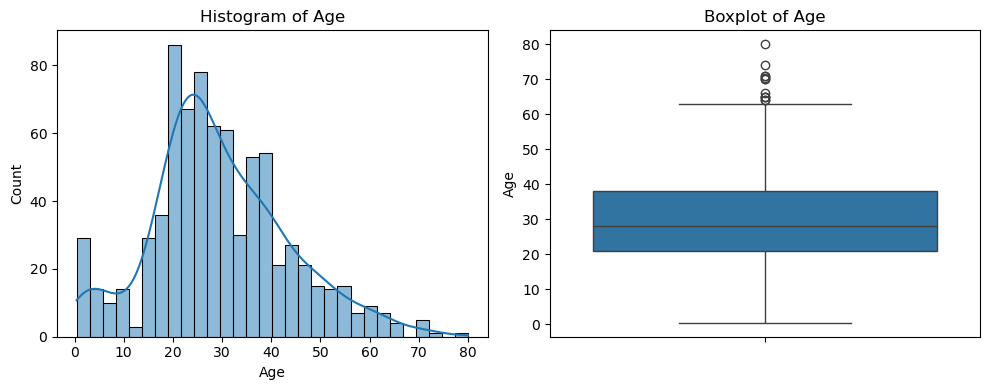

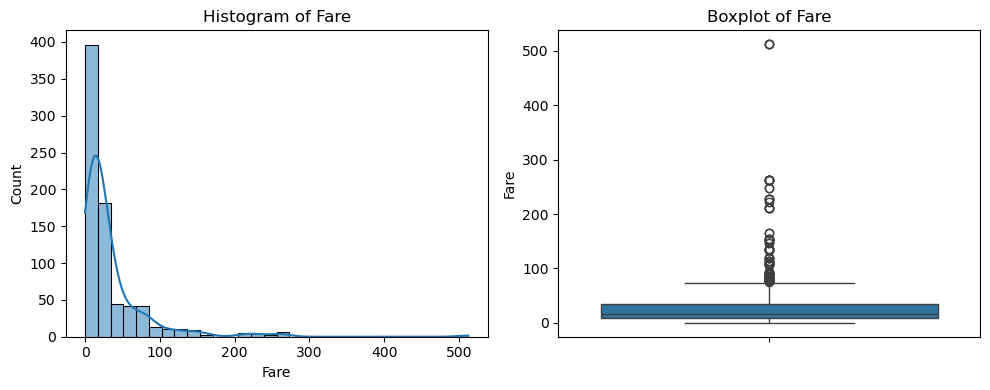

In [18]:
for i in ["Age","Fare"]:
    plt.figure(figsize=(10,4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[i], kde=True, bins=30)
    plt.title(f'Histogram of {i}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data[i])
    plt.title(f'Boxplot of {i}')

    plt.tight_layout()
    plt.show()

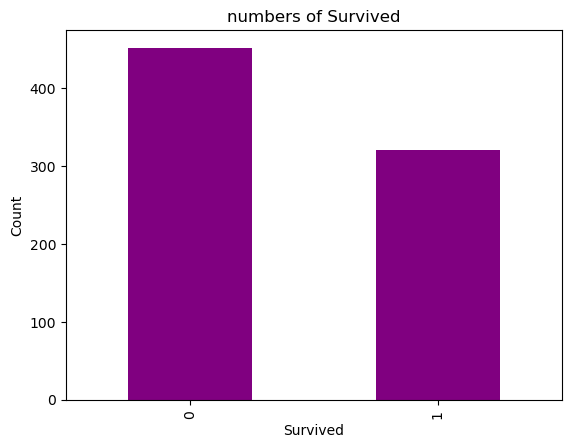

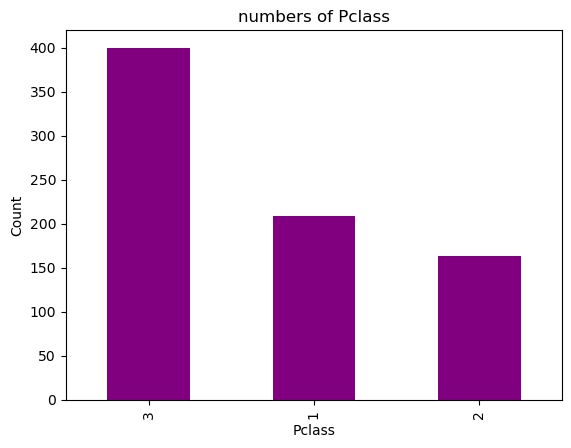

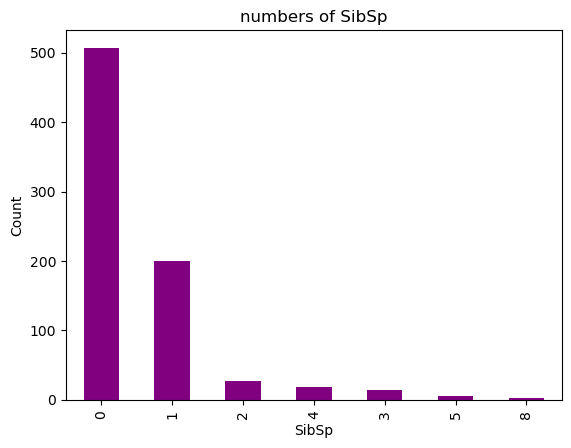

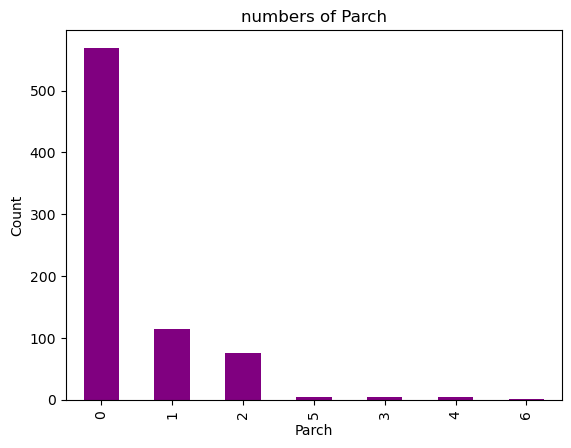

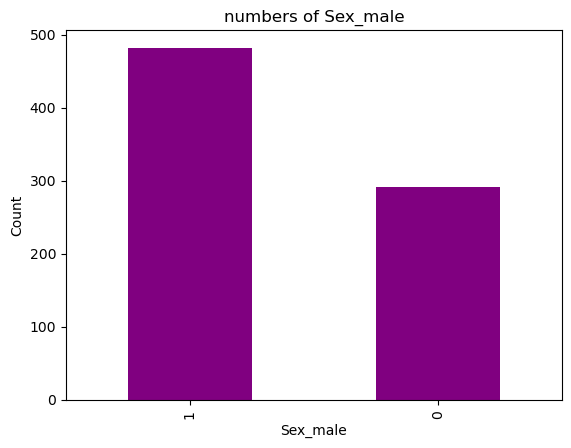

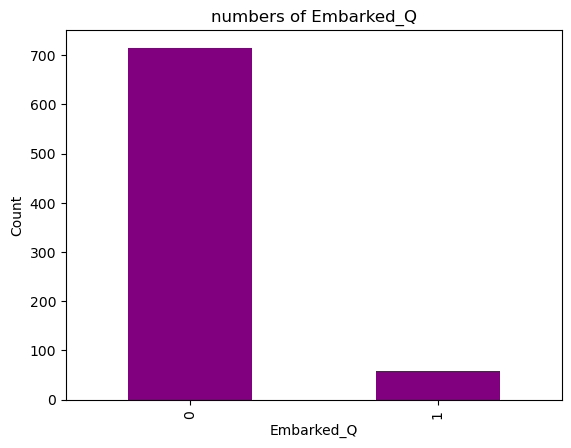

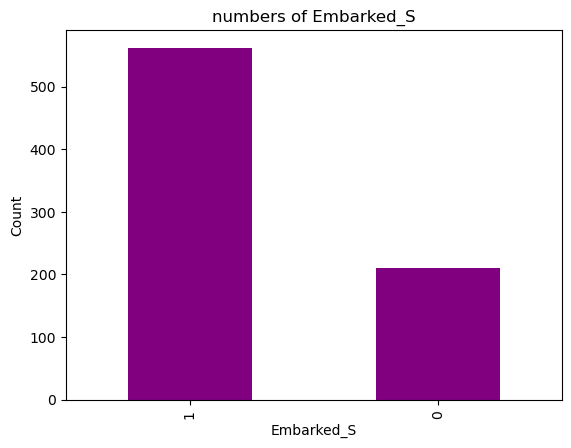

In [19]:
for cat in cat_col.columns:
        counts = data[cat].value_counts()
    
        # Plot vertical bar chart
        counts.plot(kind='bar', color='purple')
        plt.xlabel(cat)
        plt.ylabel("Count")
        plt.title(f"numbers of {cat}")
        plt.show()

In [20]:
data[["Age", "Fare"]].corr()

,Age,Fare
Age,1.000000,0.114124
Fare,0.114124,1.000000


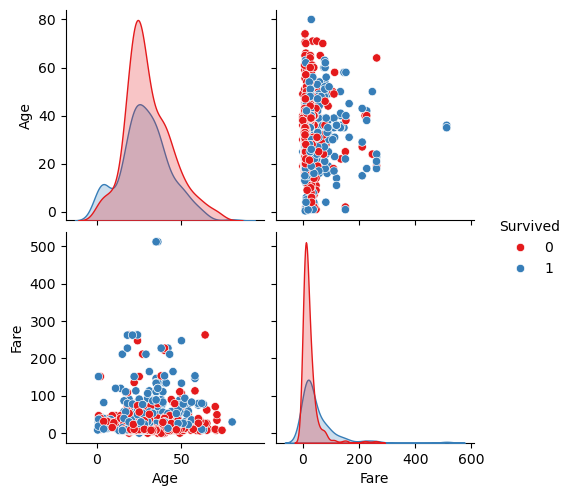

In [21]:
sns.pairplot(data=data, 
             vars=["Age", "Fare"],  # columns to plot
             hue="Survived",               # column to color by
             palette="Set1")                # optional color palette
plt.show()

# Modeling the machine 

In [22]:
X= data.drop("Survived",axis=1)
y= data["Survived"]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Normalizing and standardizing the data 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train) # fit_transfor is used for training ddata
X_test =scaler.transform(X_test) # tranform to traing data 


In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred= model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7935483870967742
Confusion Matrix:
 [[77  8]
 [24 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83        85
           1       0.85      0.66      0.74        70

    accuracy                           0.79       155
   macro avg       0.81      0.78      0.78       155
weighted avg       0.80      0.79      0.79       155



In [28]:
test_df = pd.read_csv("Titanic_test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
test_df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1, inplace=True)

In [30]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [31]:
test_df["Age"] = test_df.groupby(["Sex","Pclass"])["Age"].transform(lambda x: x.fillna(x.median()))


In [32]:
test_df['Fare']= test_df['Fare'].fillna(test_df['Fare'].mean())

In [33]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [34]:
test_df= pd.get_dummies(test_df, columns=['Sex','Embarked'], drop_first=True, dtype= int )

In [35]:
test_df

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,24.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,24.0,0,0,8.0500,1,0,1


In [36]:

X_test2 =scaler.transform(test_df)


In [37]:
X_test2

array([[ 0.92355561,  0.32283035, -0.53290627, ...,  0.78331157,
         3.75142249, -1.63663418],
       [ 0.92355561,  1.20988147,  0.4835631 , ..., -1.27663121,
        -0.26656555,  0.61101009],
       [-0.24125534,  2.27434283, -0.53290627, ...,  0.78331157,
         3.75142249, -1.63663418],
       ...,
       [ 0.92355561,  0.60668671, -0.53290627, ...,  0.78331157,
        -0.26656555,  0.61101009],
       [ 0.92355561, -0.4222926 , -0.53290627, ...,  0.78331157,
        -0.26656555,  0.61101009],
       [ 0.92355561, -0.4222926 ,  0.4835631 , ...,  0.78331157,
        -0.26656555, -1.63663418]])

In [38]:
Y_pred= model.predict(X_test2)

In [39]:
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [40]:
Sur = pd.DataFrame ({"Survived":Y_pred})
Sur

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [41]:
new_data= pd.concat([Sur,test_df],axis=1,)


In [42]:
new_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,1,1,0
1,0,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0
3,0,3,27.0,0,0,8.6625,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,0,3,24.0,0,0,8.0500,1,0,1
414,1,1,39.0,0,0,108.9000,0,0,0
415,0,3,38.5,0,0,7.2500,1,0,1
416,0,3,24.0,0,0,8.0500,1,0,1


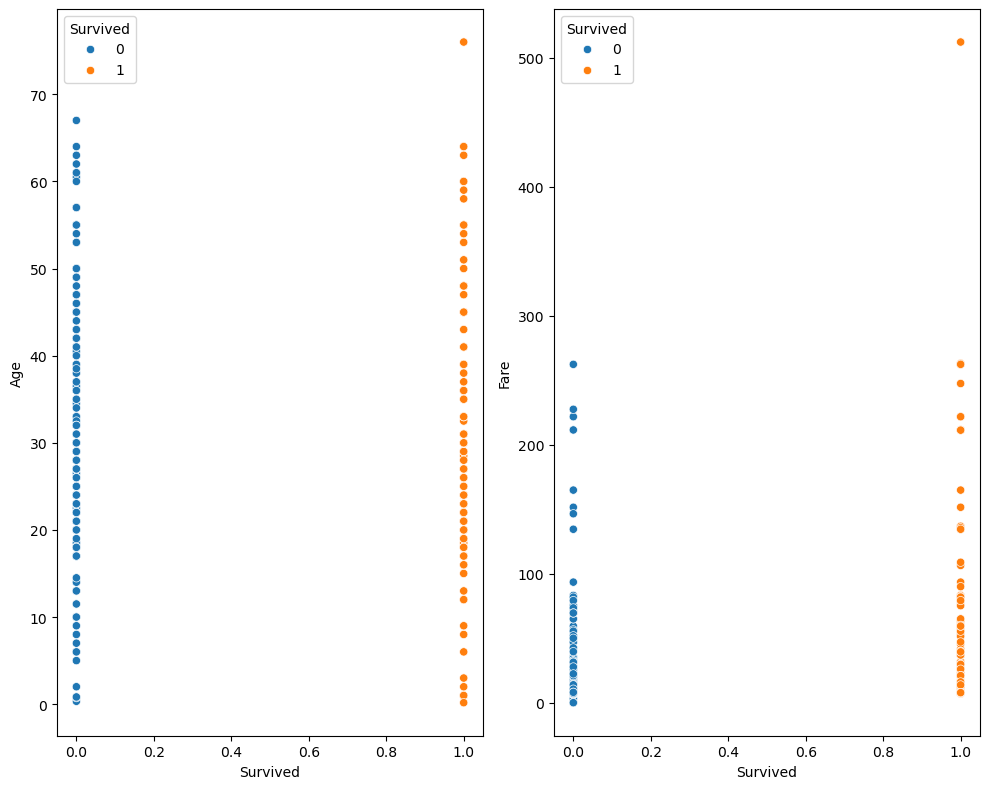

In [43]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.scatterplot(y="Age",x="Survived",data=new_data, hue="Survived")


plt.subplot(1,2,2)
sns.scatterplot(y="Fare",x="Survived",data=new_data, hue="Survived")
plt.tight_layout()
plt.show()

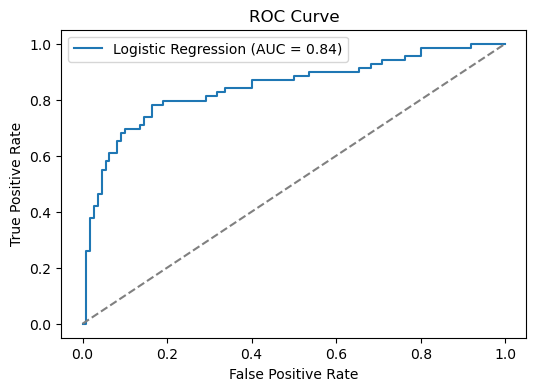

In [54]:


from sklearn.metrics import  roc_auc_score, roc_curve


# -------------------------
# 5. ROC Curve Visualization
# -------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Access is denied.


In [58]:
import streamlit as st
import pickle

In [59]:
with open("titanic_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [60]:

with open("titanic_model.pkl", "rb") as f:
    model = pickle.load(f)

In [62]:
st.title("🚢 Titanic Survival Prediction App")


pclass = st.selectbox("Passenger Class (Pclass)", [1, 2, 3])
sex = st.selectbox("Sex", ["male", "female"])
age = st.number_input("Age", min_value=0, max_value=100, value=25)
sibsp = st.number_input("Number of Siblings/Spouses (SibSp)", min_value=0, max_value=8, value=0)
parch = st.number_input("Number of Parents/Children (Parch)", min_value=0, max_value=6, value=0)
fare = st.number_input("Fare", min_value=0.0, value=30.0)
embarked = st.selectbox("Port of Embarkation", ["C", "Q", "S"])

2025-10-02 18:16:15.826 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-02 18:16:16.135 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-10-02 18:16:16.136 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-02 18:16:16.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-02 18:16:16.141 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-02 18:16:16.144 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-02 18:16:16.151 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-02 18:16:16.153 Session state does not 

In [66]:
sex_male = 1 if sex == "male" else 0
embarked_Q = 1 if embarked == "Q" else 0
embarked_S = 1 if embarked == "S" else 0

# Create dataframe with correct column order
input_data = pd.DataFrame({
    "Pclass": [pclass],
    "Age": [age],
    "SibSp": [sibsp],
    "Parch": [parch],
    "Fare": [fare],
    "Sex_male": [sex_male],
    "Embarked_Q": [embarked_Q],
    "Embarked_S": [embarked_S]
})

In [67]:
if st.button("Predict Survival"):
    prediction = model.predict(input_data)[0]
    prob = model.predict_proba(input_data)[0][1]

    if prediction == 1:
        st.success(f"✅ This passenger would have SURVIVED with probability {prob:.2f}")
    else:
        st.error(f"❌ This passenger would NOT have survived (Survival Probability {prob:.2f})")

2025-10-02 18:22:28.860 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-02 18:22:28.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-02 18:22:28.869 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-02 18:22:28.874 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-02 18:22:28.878 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [65]:
streamlit run titanic_app.py


SyntaxError: invalid syntax (1373597936.py, line 1)